<a href="https://colab.research.google.com/github/1299-2004/neural-network/blob/main/neural_network2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.3687 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0982
Epoch 2/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3673 - loss: 1.0977 - val_accuracy: 0.3333 - val_loss: 1.0973
Epoch 3/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4844 - loss: 1.0971 - val_accuracy: 0.7333 - val_loss: 1.0960
Epoch 4/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6206 - loss: 1.0955 - val_accuracy: 0.7333 - val_loss: 1.0939
Epoch 5/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7487 - loss: 1.0934 - val_accuracy: 0.7333 - val_loss: 1.0905
Epoch 6/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7436 - loss: 1.0893 - val_accuracy: 0.7333 - val_loss: 1.0851
Epoch 7/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7985 - loss: 1.0826 - val_accuracy: 0.7333 - val_loss: 1.0769
Epoch 8/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7767 - loss: 1.0739 - val_accuracy: 0.7333 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


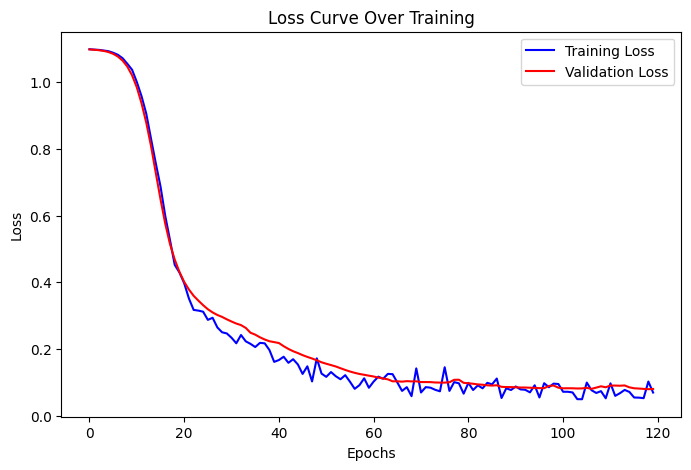

Final Model Accuracy: 96.67%
Final Model F1-Score: 0.97


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Layer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load dataset manually
df = pd.read_csv("iris (1).csv")

# Preprocessing steps
X = df.iloc[:, :-1].values  # Extract features
y = df.iloc[:, -1].values   # Extract labels

# Encode categorical labels into numerical values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ FIXED: Move weight initialization to build()
class LogActivation(Layer):
    def build(self, input_shape):
        self.k0 = self.add_weight(shape=(1,), initializer="random_normal", trainable=True)
        self.k1 = self.add_weight(shape=(1,), initializer="random_normal", trainable=True)

    def call(self, inputs):
        return self.k0 * tf.math.log(1 + tf.abs(inputs)) + self.k1 * inputs

# ✅ FIXED: Use keras.Input() instead of input_shape=()
inputs = keras.Input(shape=(X_train.shape[1],))
x = Dense(32, activation=LogActivation())(inputs)
x = Dropout(0.2)(x)
x = Dense(32, activation=LogActivation())(x)
x = Dropout(0.2)(x)
outputs = Dense(len(set(y)), activation='softmax')(x)

model = keras.Model(inputs, outputs)

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=120, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate model performance
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot training vs validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve Over Training")
plt.show()

# Print final accuracy and F1-score
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')
print(f'Final Model F1-Score: {f1:.2f}')



